In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install --upgrade tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 34.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 32.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 21.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attemptin

In [1]:
import tensorflow as tf
tf_version = tf.__version__

print("TensorFlow version:", tf_version)

2024-04-09 16:18:30.405910: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 16:18:30.406022: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 16:18:30.532335: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow version: 2.15.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import metrics, Model, layers
from tensorflow.keras import layers, models, optimizers
from pathlib import Path
from PIL import Image

2024-04-09 17:45:31.257522: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-09 17:45:31.257619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-09 17:45:31.454083: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**DATASET**

In [2]:
from pathlib import Path
import os
import cv2

# Set the data directory path
data_dir = '/kaggle/input/cellimagesfordetectingmalaria/cell_images'

# Create the paths for parasitized and uninfected images
parasitized_data = list(Path(os.path.join(data_dir, 'Parasitized')).rglob('*.png'))
uninfected_data = list(Path(os.path.join(data_dir, 'Uninfected')).rglob('*.png'))

data = []
labels = []
IMG_SIZE = 130

In [3]:
for img_path in parasitized_data:
    try:
        img = cv2.imread(str(img_path))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(1)
    except Exception as e:
        print(f"Error loading parasitized image {img_path}: {e}")

# Load uninfected images
for img_path in uninfected_data:
    try:
        img = cv2.imread(str(img_path))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(0)
    except Exception as e:
        print(f"Error loading uninfected image {img_path}: {e}")

image_data = np.array(data)
labels = np.array(labels)

print("image_data shape:", image_data.shape)
print("labels shape:", labels.shape)

image_data shape: (27558, 130, 130, 3)
labels shape: (27558,)


**VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt

# Class Distribution Bar Plot
plt.figure(figsize=(6, 4))
plt.bar(['Parasitized', 'Uninfected'], [np.sum(labels==1), np.sum(labels==0)], color=['red', 'blue'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Sample Images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image_data[i])
    if labels[i] == 1:
        plt.title('Parasitized')
    else:
        plt.title('Uninfected')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import random
num_images = 12
num_rows = 4
num_cols = 3
# Get random indices for each class
parasitized_indices = np.where(labels == 1)[0]
uninfected_indices = np.where(labels == 0)[0]
# Choose random indices from each class
random_parasitized_indices = random.sample(list(parasitized_indices), num_images // 2)
random_uninfected_indices = random.sample(list(uninfected_indices), num_images // 2)
# Plot random images
plt.figure(figsize=(10, 10))
# Plot parasitized images
for i, idx in enumerate(random_parasitized_indices):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(image_data[idx])
    plt.title('Parasitized')
    plt.axis('off')
# Plot uninfected images
for i, idx in enumerate(random_uninfected_indices):
    plt.subplot(num_rows, num_cols, i + num_images // 2 + 1)
    plt.imshow(image_data[idx])
    plt.title('Uninfected')
    plt.axis('off')
plt.tight_layout()
plt.show()

**TEST-TRAIN SPLIT**

In [4]:
from sklearn.model_selection import train_test_split

# Shuffle the indices of the dataset
#indices = np.arange(len(image_data))
#np.random.shuffle(indices)

# Use the shuffled indices to shuffle the dataset
#shuffled_image_data = image_data[indices]
#shuffled_labels = labels[indices]

# Split the shuffled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=0)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)


**AUGMENTATION**

In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
    

In [6]:
datagen.fit(X_train)
train_generator = datagen.flow(X_train, y_train, batch_size=32)

**CLASS DISTRIBUTION VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of parasitized and uninfected samples in training and testing sets
train_parasitized_count = np.sum(y_train[:, 1])
train_uninfected_count = np.sum(y_train[:, 0])
test_parasitized_count = np.sum(y_test[:, 1])
test_uninfected_count = np.sum(y_test[:, 0])

# Plot the counts in two different graphs
plt.figure(figsize=(10, 5))

# Plot training set counts
plt.subplot(1, 2, 1)
plt.bar(['Parasitized', 'Uninfected'], [train_parasitized_count, train_uninfected_count], color=['red', 'blue'])
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Plot testing set counts
plt.subplot(1, 2, 2)
plt.bar(['Parasitized', 'Uninfected'], [test_parasitized_count, test_uninfected_count], color=['red', 'blue'])
plt.title('Validation Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**VGG16**

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense

# Instantiating the VGG16 model
vgg16 = VGG16(
    input_shape=[IMG_SIZE, IMG_SIZE] + [3],
    weights='imagenet',  # Include the pre-trained weights on ImageNet
    include_top=False
)

for layer in vgg16.layers:
    layer.trainable = False

# Defining input and output to the model
x = Flatten()(vgg16.output)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.6)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.6)(x)
prediction = Dense(2, activation='softmax')(x)

# Creating a new model with our custom top layers
model_vgg16 = Model(inputs=vgg16.input, outputs=prediction)

# Print model summary
model_vgg16.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 130, 130, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 130, 130, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 130, 130, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 65, 65, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 65, 65, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 65, 65, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,19

 Total params: 65,062,722 (248.19 MB)

 Trainable params: 50,348,034 (192.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

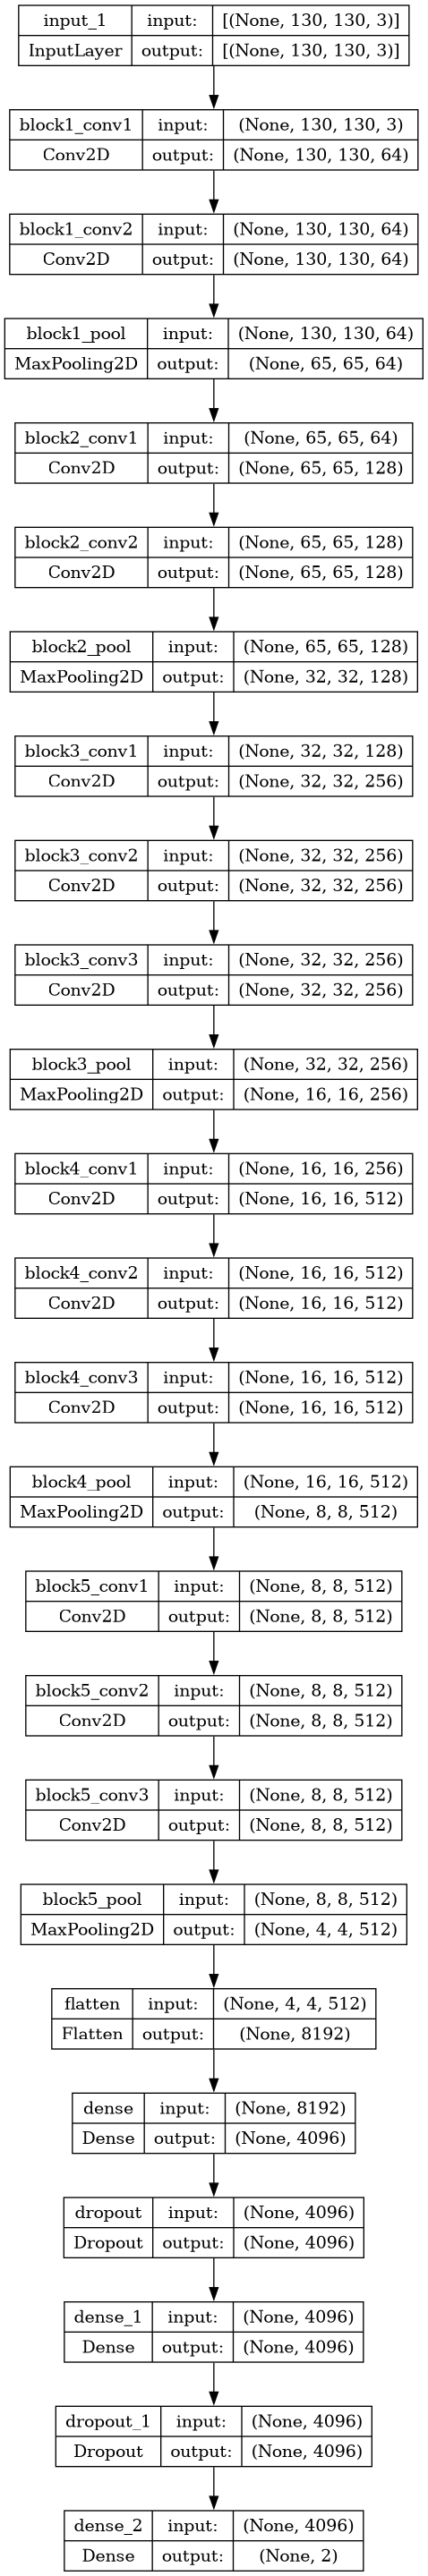

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model_vgg16, to_file='model_summary.png', show_shapes=True, show_layer_names=True)


In [14]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.00001)
model_vgg16.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [16]:
history_vgg16_10 = model_vgg16.fit(train_generator, epochs=10, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/10
  2/689 ━━━━━━━━━━━━━━━━━━━━ 51s 75ms/step - accuracy: 0.5391 - loss: 1.0430  

W0000 00:00:1712686566.801435      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


229/689 ━━━━━━━━━━━━━━━━━━━━ 1:17 168ms/step - accuracy: 0.5841 - loss: 0.7973

W0000 00:00:1712686605.003211      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


689/689 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6531 - loss: 0.6784

W0000 00:00:1712686678.395922      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


689/689 ━━━━━━━━━━━━━━━━━━━━ 127s 175ms/step - accuracy: 0.6532 - loss: 0.6782 - val_accuracy: 0.8714 - val_loss: 0.2938
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 112s 161ms/step - accuracy: 0.8222 - loss: 0.3978 - val_accuracy: 0.8948 - val_loss: 0.2561
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 113s 162ms/step - accuracy: 0.8429 - loss: 0.3583 - val_accuracy: 0.9075 - val_loss: 0.2316
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 111s 160ms/step - accuracy: 0.8654 - loss: 0.3193 - val_accuracy: 0.9236 - val_loss: 0.2154
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 114s 164ms/step - accuracy: 0.8755 - loss: 0.3077 - val_accuracy: 0.9182 - val_loss: 0.2101
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 113s 162ms/step - accuracy: 0.8810 - loss: 0.2921 - val_accuracy: 0.9207 - val_loss: 0.2027
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 113s 163ms/step - accuracy: 0.8851 - loss: 0.2855 - val_accuracy: 0.9278 - val_loss: 0.1952
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 113s 162ms/step - accuracy: 0.8859 - loss: 0.28

In [ ]:
history_vgg16_25 = model_vgg16.fit(train_generator, epochs=25, validation_data=(X_test, y_test))

In [ ]:
history_vgg16_50 = model_vgg16.fit(train_generator, epochs=50, validation_data=(X_test, y_test))

In [ ]:
history_vgg16_75 = model_vgg16.fit(train_generator, epochs=75, validation_data=(X_test, y_test))

In [ ]:
history_vgg16_100 = model_vgg16.fit(train_generator, epochs=100, validation_data=(X_test, y_test))

In [18]:
VGG16_10_train_loss = history_vgg16_10.history['loss']
VGG16_10_val_loss = history_vgg16_10.history['val_loss']
VGG16_10_train_acc = history_vgg16_10.history['accuracy']
VGG16_10_val_acc = history_vgg16_10.history['val_accuracy']
print(VGG16_10_train_loss)
print(VGG16_10_val_loss)
print(VGG16_10_train_acc)
print(VGG16_10_val_acc)

[0.5532072186470032, 0.3844771981239319, 0.34376275539398193, 0.3216296136379242, 0.30454033613204956, 0.29144981503486633, 0.28587570786476135, 0.28477367758750916, 0.27687323093414307, 0.277030348777771]
[0.2937818765640259, 0.25608885288238525, 0.2315973937511444, 0.21537494659423828, 0.21006624400615692, 0.20265543460845947, 0.1952115148305893, 0.1945173442363739, 0.18639133870601654, 0.19424912333488464]
[0.7284314632415771, 0.8302639722824097, 0.8511294722557068, 0.8651909828186035, 0.8768483996391296, 0.8808854222297668, 0.8853306770324707, 0.8853760361671448, 0.8898212909698486, 0.888143002986908]
[0.8713715672492981, 0.8947750329971313, 0.9074745774269104, 0.9236211776733398, 0.9181784987449646, 0.9207184314727783, 0.9277939200401306, 0.9279752969741821, 0.9346879720687866, 0.9261611104011536]


In [ ]:
history_vgg16_10.history['accuracy'] = []
history_vgg16_10.history['val_accuracy'] = []
history_vgg16_10.history['loss'] = []
history_vgg16_10.history['val_loss'] = []

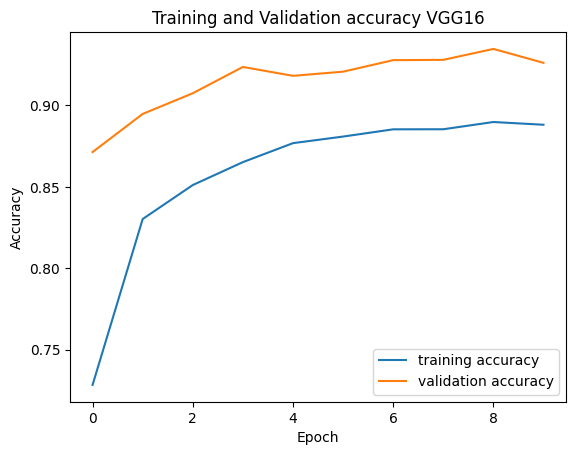

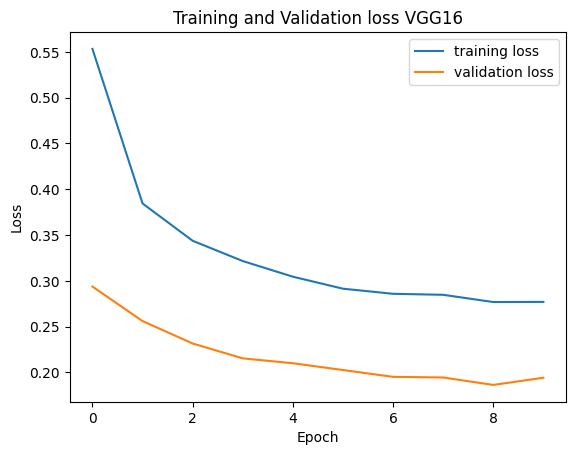

In [19]:
plt.plot(history_vgg16_10.history['accuracy'], label='training accuracy')
plt.plot(history_vgg16_10.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation accuracy VGG16')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_vgg16_10.history['loss'], label='training loss')
plt.plot(history_vgg16_10.history['val_loss'], label='validation loss')
plt.title('Training and Validation loss VGG16')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Predict labels for training data
train_predictions = model_vgg16.predict(X_train)
train_predictions_classes = np.argmax(train_predictions, axis=1)
y_train_classes = np.argmax(y_train, axis=1)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train_classes, train_predictions_classes)

# Predict labels for testing data
test_predictions = model_vgg16.predict(X_test)
test_predictions_classes = np.argmax(test_predictions, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test_classes, test_predictions_classes)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for training data
train_classification_report = classification_report(y_train_classes, train_predictions_classes)

# Generate classification report for testing data
test_classification_report = classification_report(y_test_classes, test_predictions_classes)

print("Classification Report for Training Data:")
print(train_classification_report)

print("\nClassification Report for Testing Data:")
print(test_classification_report)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

y_pred_proba = model_vgg16.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
cm = confusion_matrix(y_test[:, 1], y_pred)

fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(['uninfected', 'parasitized']))
plt.xticks(tick_marks, ['uninfected', 'parasitized'], rotation=45)
plt.yticks(tick_marks, ['uninfected', 'parasitized'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Instantiating the VGG19 model
vgg19 = VGG19(
    input_shape=[IMG_HEIGHT, IMG_WIDTH] + [3],
    weights='imagenet',  # Include the pre-trained weights on ImageNet
    include_top=False
)

# To use our own input and get the desired output
# Do not train the existing weights
for layer in vgg19.layers:
    layer.trainable = False

# Defining input and output to the model
x = Flatten()(vgg19.output)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(1, activation='sigmoid')(x)